In [ ]:
## a demo of running U-SPORF on Iris dataset

In [2]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score

from rerf.urerf import UnsupervisedRandomForest

In [22]:
iris = datasets.load_iris()

X = iris.data
print(X.shape)

(150, 4)


In [23]:
clf = UnsupervisedRandomForest(projection_matrix="RerF", random_state=0)
print(clf)

UnsupervisedRandomForest(feature_combinations='auto', max_depth=None,
                         max_features='auto', min_samples_split='auto',
                         n_estimators=100, n_jobs=None,
                         projection_matrix='RerF', random_state=0)


[[1.   0.07 0.05 ... 0.   0.   0.  ]
 [0.07 1.   0.16 ... 0.   0.   0.  ]
 [0.04 0.23 1.   ... 0.   0.   0.  ]
 ...
 [0.   0.   0.   ... 1.   0.12 0.12]
 [0.   0.   0.   ... 0.08 1.   0.02]
 [0.   0.   0.   ... 0.06 0.01 1.  ]]


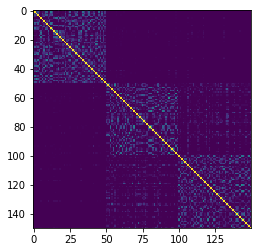

In [24]:
clf.fit(X)
sim_mat = clf.transform()
print(sim_mat)
plt.imshow(sim_mat)

In [25]:
cluster = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward")
predict_labels = cluster.fit_predict(sim_mat)
score = adjusted_rand_score(iris.target, predict_labels)

print("labels\n", iris.target)
print("predict\n", predict_labels)
print("Adjusted Rand Score:", score)

labels
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
predict
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 1 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
Adjusted Rand Score: 0.745503868180448


In [ ]:
# URerf test run on randomly generated data

In [68]:
data = datasets.make_classification(n_samples=1000, n_features=10, n_informative=2, n_redundant=2, n_repeated=0, 
                                    n_classes=2, n_clusters_per_class=2, weights=None, flip_y=0.01, random_state=0)

X = data[0]
Y = data[1]

print(X.shape)

(1000, 10)


In [69]:
clf = UnsupervisedRandomForest(projection_matrix="RerF", random_state=0)
print(clf)

UnsupervisedRandomForest(feature_combinations='auto', max_depth=None,
                         max_features='auto', min_samples_split='auto',
                         n_estimators=100, n_jobs=None,
                         projection_matrix='RerF', random_state=0)


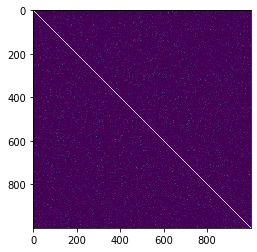

In [70]:
clf.fit(X)
sim_mat = clf.transform()
plt.imshow(sim_mat)

In [71]:
cluster = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward")
predict_labels = cluster.fit_predict(sim_mat)
score = adjusted_rand_score(Y, predict_labels)

print("Adjusted Rand Score:", score)

Adjusted Rand Score: 0.5945972536251178


In [ ]:
# change the shape of the dataset and try clustering on the result of URerf
# meanwhile, repeat the experiment to see the consistency

In [83]:
import numpy as np

Average Adjusted Rand Scores: 0.5754753316206774
Variance of Adjusted Rand Scores 0.0007901774703844471


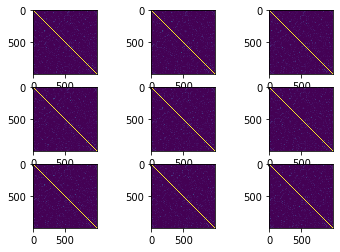

In [84]:
scores = []

for i in range(9):
    data = datasets.make_classification(n_samples=1000, n_features=10, n_informative=2, n_redundant=2, n_repeated=0, 
                                    n_classes=2, n_clusters_per_class=2, weights=None, flip_y=0.01, random_state=0)

    X = data[0]
    Y = data[1]
    
    clf = UnsupervisedRandomForest(projection_matrix="RerF", random_state=0)
    clf.fit(X)
    sim_mat = clf.transform()
    plt.subplot(3, 3, i+1)
    plt.imshow(sim_mat)
    
    cluster = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward")
    predict_labels = cluster.fit_predict(sim_mat)
    score = adjusted_rand_score(Y, predict_labels)

    scores.append(score)
    
print("Average Adjusted Rand Scores:", np.mean(scores))
print("Variance of Adjusted Rand Scores", np.var(scores))

Average Adjusted Rand Scores: 0.5925575219880876
Variance of Adjusted Rand Scores 0.00045693685466966806


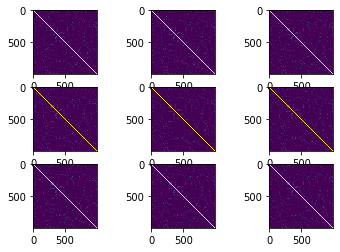

In [87]:
scores = []

for i in range(9):
    data = datasets.make_classification(n_samples=1000, n_features=10, n_informative=2, n_redundant=2, n_repeated=2, 
                                    n_classes=2, n_clusters_per_class=2, weights=None, flip_y=0.01, random_state=0)

    X = data[0]
    Y = data[1]
    
    clf = UnsupervisedRandomForest(projection_matrix="RerF", random_state=0)
    clf.fit(X)
    sim_mat = clf.transform()
    plt.subplot(3, 3, i+1)
    plt.imshow(sim_mat)
    
    cluster = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward")
    predict_labels = cluster.fit_predict(sim_mat)
    score = adjusted_rand_score(Y, predict_labels)

    scores.append(score)
    
print("Average Adjusted Rand Scores:", np.mean(scores))
print("Variance of Adjusted Rand Scores", np.var(scores))

Average Adjusted Rand Scores: 0.24704633273634602
Variance of Adjusted Rand Scores 0.007791172088668954


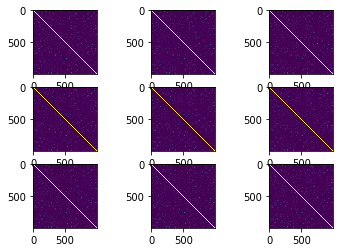

In [102]:
scores = []

for i in range(9):
    data = datasets.make_classification(n_samples=1000, n_features=10, n_informative=3, n_redundant=3, n_repeated=0, 
                                    n_classes=2, n_clusters_per_class=2, weights=None, flip_y=0.01, random_state=0)

    X = data[0]
    Y = data[1]
    
    clf = UnsupervisedRandomForest(projection_matrix="RerF", random_state=0)
    clf.fit(X)
    sim_mat = clf.transform()
    plt.subplot(3, 3, i+1)
    plt.imshow(sim_mat)
    
    cluster = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward")
    predict_labels = cluster.fit_predict(sim_mat)
    score = adjusted_rand_score(Y, predict_labels)

    scores.append(score)
    
print("Average Adjusted Rand Scores:", np.mean(scores))
print("Variance of Adjusted Rand Scores", np.var(scores))

Average Adjusted Rand Scores: 0.5244281559115707
Variance of Adjusted Rand Scores 0.0022153837751745175


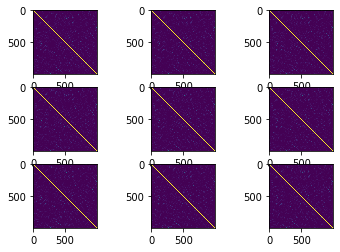

In [94]:
scores = []

for i in range(9):
    data = datasets.make_classification(n_samples=1000, n_features=10, n_informative=3, n_redundant=2, n_repeated=0, 
                                    n_classes=3, n_clusters_per_class=1, weights=None, flip_y=0.01, random_state=0)

    X = data[0]
    Y = data[1]
    
    clf = UnsupervisedRandomForest(projection_matrix="RerF", random_state=0)
    clf.fit(X)
    sim_mat = clf.transform()
    plt.subplot(3, 3, i+1)
    plt.imshow(sim_mat)
    
    cluster = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward")
    predict_labels = cluster.fit_predict(sim_mat)
    score = adjusted_rand_score(Y, predict_labels)

    scores.append(score)
    
print("Average Adjusted Rand Scores:", np.mean(scores))
print("Variance of Adjusted Rand Scores", np.var(scores))

Average Adjusted Rand Scores: 0.40506824904270883
Variance of Adjusted Rand Scores 0.0010418610289018014


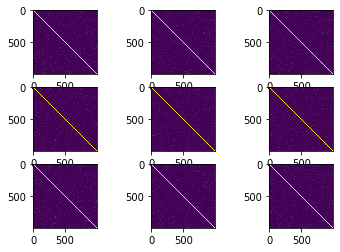

In [95]:
scores = []

for i in range(9):
    data = datasets.make_classification(n_samples=1000, n_features=10, n_informative=3, n_redundant=2, n_repeated=0, 
                                    n_classes=3, n_clusters_per_class=2, weights=None, flip_y=0.01, random_state=0)

    X = data[0]
    Y = data[1]
    
    clf = UnsupervisedRandomForest(projection_matrix="RerF", random_state=0)
    clf.fit(X)
    sim_mat = clf.transform()
    plt.subplot(3, 3, i+1)
    plt.imshow(sim_mat)
    
    cluster = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward")
    predict_labels = cluster.fit_predict(sim_mat)
    score = adjusted_rand_score(Y, predict_labels)

    scores.append(score)
    
print("Average Adjusted Rand Scores:", np.mean(scores))
print("Variance of Adjusted Rand Scores", np.var(scores))

Average Adjusted Rand Scores: 0.5235362687048377
Variance of Adjusted Rand Scores 0.0002231622065700234


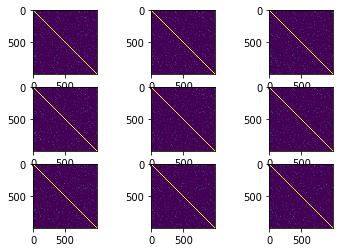

In [96]:
scores = []

for i in range(9):
    data = datasets.make_classification(n_samples=1000, n_features=10, n_informative=2, n_redundant=2, n_repeated=0, 
                                    n_classes=3, n_clusters_per_class=1, weights=None, flip_y=0.01, random_state=0)

    X = data[0]
    Y = data[1]
    
    clf = UnsupervisedRandomForest(projection_matrix="RerF", random_state=0)
    clf.fit(X)
    sim_mat = clf.transform()
    plt.subplot(3, 3, i+1)
    plt.imshow(sim_mat)
    
    cluster = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward")
    predict_labels = cluster.fit_predict(sim_mat)
    score = adjusted_rand_score(Y, predict_labels)

    scores.append(score)
    
print("Average Adjusted Rand Scores:", np.mean(scores))
print("Variance of Adjusted Rand Scores", np.var(scores))

In [ ]:
# Brief summary: The URerf gives decent scores on most of the randomly generated datasets, and is consistent in repeated tests. 
# URerf seems not sensitive to bad features, but increase in cluster number will hold back the classification score. 
# The issue can probably be solved by using more suitable clustering methods. 